### Курсовая работа
#### Прудникова Анастасия М8О-114СВ-24

Датасет Chest X-Ray Images предназначен для выявления пневмонии на рентгеновских снимках грудной клетки. Он включает в себя два класса изображений:

NORMAL — снимки без признаков пневмонии.
PNEUMONIA — снимки с диагностированной пневмонией

In [ ]:
!curl -L -o chest-xray-pneumonia.zip https://www.kaggle.com/api/v1/datasets/download/paultimothymooney/chest-xray-pneumonia

In [ ]:
!unzip chest-xray-pneumonia.zip -d chest-xray-pneumonia

In [29]:
import os
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [30]:
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32
EPOCHS = 10
DATASET_DIR = 'chest-xray-pneumonia/chest_xray/test'  # путь к тренировочной директории

Функция загрузки данных загружает изображения и их метки из указанной директории и возвращает массивы изображений и меток

In [31]:
def load_data(dataset_dir):
    images = []
    labels = []
    for label, category in enumerate(['NORMAL', 'PNEUMONIA']):
        category_path = os.path.join(dataset_dir, category)
        for file in os.listdir(category_path):
            img_path = os.path.join(category_path, file)
            try:
                img = Image.open(img_path).convert('RGB')
                img = img.resize(IMAGE_SIZE)
                images.append(np.array(img))
                labels.append(label)
            except Exception as e:
                print(f"Ошибка при обработке файла {img_path}: {e}")
    return np.array(images), np.array(labels)

# Загрузка данных
images, labels = load_data(DATASET_DIR)
images = images / 255.0  # Нормализация пикселей

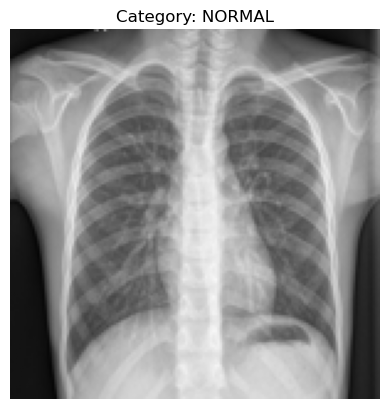

In [32]:
plt.imshow(images[0])
plt.title(f"Category: {'NORMAL' if labels[0] == 0 else 'PNEUMONIA'}")
plt.axis('off')
plt.show()

Функция анализа данных показывает статистику по данным: количество записей, размер одной записи, процент разбиения на классы, количество пропусков, количество полей, типы данных

In [41]:
def analyze_data(images, labels):
    num_samples = len(labels)
    num_features = images.shape[1] * images.shape[2] * images.shape[3]
    sample_size = images[0].nbytes * images[0].size
    missing_values = np.sum(np.isnan(images))

    print(f"Количество записей: {num_samples}")
    print(f"Объём одной записи (в байтах): {sample_size}")
    print(f"Количество полей: {num_features}")
    print(f"Количество пропусков: {missing_values}")
    print(f"Тип данных изображений: {images.dtype}")

    unique, counts = np.unique(labels, return_counts=True)
    for label, count in zip(unique, counts):
        category = 'NORMAL' if label == 0 else 'PNEUMONIA'
        print(f"{category}: {count} ({(count / num_samples) * 100:.2f}%)")

analyze_data(images, labels)

Количество записей: 624
Объём одной записи (в байтах): 36450000000
Количество полей: 67500
Количество пропусков: 0
Тип данных изображений: float64
NORMAL: 234 (37.50%)
PNEUMONIA: 390 (62.50%)


In [34]:
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

#### Построение модели
Определяет архитектуру сверточной нейронной сети

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Обучение модели

In [36]:
history = model.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val, y_val)
)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step - accuracy: 0.5755 - loss: 0.7161 - val_accuracy: 0.6080 - val_loss: 0.6112
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step - accuracy: 0.7370 - loss: 0.5283 - val_accuracy: 0.7760 - val_loss: 0.4342
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step - accuracy: 0.8580 - loss: 0.3379 - val_accuracy: 0.8880 - val_loss: 0.2647
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 202ms/step - accuracy: 0.8858 - loss: 0.2754 - val_accuracy: 0.7440 - val_loss: 0.4859
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step - accuracy: 0.8650 - loss: 0.3213 - val_accuracy: 0.9040 - val_loss: 0.2284
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 191ms/step - accuracy: 0.9054 - loss: 0.2423 - val_accuracy: 0.8880 - val_loss: 0.2496
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 196ms/step - accuracy: 0.9303 - loss: 0.1640 - val_accuracy: 0.8480 - val_loss: 0.3209
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 221ms/step - accuracy: 0.9460 - loss: 0.1594 - val_accuracy: 0.

In [37]:
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8529 - loss: 0.3952
Loss: 0.3618
Accuracy: 0.8640


#### Визуализация результатов обучения
Отображает графики потерь и точности для выборок

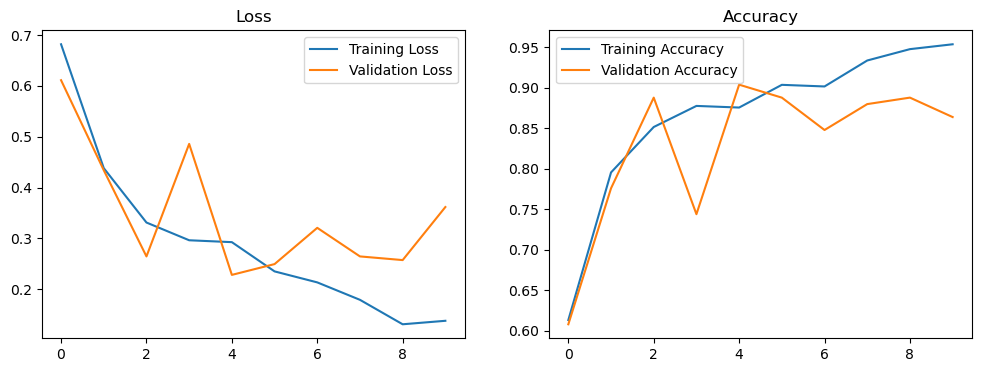

In [38]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

### Вывод
В курсовой работе были определены статистические характеристики датасета, включая количество записей, размер одного изображения, количество пропусков и процентное соотношение классов и построена свёрточная нейросеть. 

Датасет: Chest X-Ray Images (Pneumonia).

Метрика: точность классификации (Accuracy).

Методика испытаний: Деление на тренировочную и валидационную выборки, фиксированное количество эпох.